<h1 style="text-align:center;font-family:times;font-size:30px;font-style: italic;font-family:ALGERIAN;border:solid;color:skyblue">
Projet de machine learning : House price prediction, Modélisation</h1>
 

<br>

<center><img src="https://images.unsplash.com/photo-1516156008625-3a9d6067fab5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"></center>

<center><div style="font-family:times;font-size:25px">
     Groupe 4 <br> 
    Ange Gnimdou KABASSINA <br> Isabelle Danielle MOSSE <br> Moustapha WADE <br> Durel Valdez NZIALI TCHAMOU 
</div></center>

<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 1. Importation des librairies et chargement des fichiers</h1>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 Importation des librairies</h2>
</div>

In [1]:
# commençons par importer les bibliothèques nécessaires pour notre travail
import os
os.environ["OMP_NUM_THREADS"] = "1"
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad
from sklearn.compose import TransformedTargetRegressor
import warnings 
warnings.filterwarnings('ignore')

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des données</h2>
</div>

In [2]:
# emplacement de notre environement de travail 
HOME_DIR = Path.cwd().parent

# création d'une variable contenant le chemin d'acces aux données 
DATA_DIR = Path(HOME_DIR, "datas")

print(f"Work directory: {HOME_DIR} \nData directory: {DATA_DIR}")
# emplacement de notre environement de travail 
HOME_DIR = Path.cwd().parent

Work directory: C:\Users\HP ProBook\Documents\projet ml 
Data directory: C:\Users\HP ProBook\Documents\projet ml\datas


In [3]:
# chargement des données 
dataset = pd.read_csv(Path(DATA_DIR, "final_data.csv"), sep=",")


In [4]:
dataset.head()

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,...,Exterior1st_VinylSd,MasVnrType_Other,Foundation_CBlock,Foundation_Other,Foundation_PConc,CentralAir_N,CentralAir_Y,GarageType_Attchd,GarageType_Detchd,SalePrice
0,5.0,65.0,7,5,2003,2003,856,854,1710,2,...,1,0,0,0,1,0,1,1,0,208500
1,1.0,80.0,6,8,1976,1976,1262,0,1262,2,...,0,0,1,0,0,0,1,1,0,181500
2,5.0,68.0,7,5,2001,2002,920,866,1786,2,...,1,0,0,0,1,0,1,1,0,223500
3,6.0,60.0,7,5,1915,1970,756,756,1717,1,...,0,0,0,1,0,0,1,0,1,140000
4,5.0,84.0,8,5,2000,2000,1145,1053,2198,2,...,1,0,0,0,1,0,1,1,0,250000


In [5]:
dataset.shape

(1460, 41)

<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 2. Préparation des données</h1>
</div>

In [6]:
# division du jeux de données en variables explicatives et variable cible
# X est la liste des variables explicatives et y est la variable cible
X=dataset.drop(columns=['SalePrice']) # variables explicatives
y=np.log(dataset['SalePrice']) # logarithme de la variables expliquée ou cible pour rendre sa distribution normale
#y=dataset['SalePrice']

In [7]:
X.head()

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,...,Neighborhood_NAmes,Exterior1st_VinylSd,MasVnrType_Other,Foundation_CBlock,Foundation_Other,Foundation_PConc,CentralAir_N,CentralAir_Y,GarageType_Attchd,GarageType_Detchd
0,5.0,65.0,7,5,2003,2003,856,854,1710,2,...,0,1,0,0,0,1,0,1,1,0
1,1.0,80.0,6,8,1976,1976,1262,0,1262,2,...,0,0,0,1,0,0,0,1,1,0
2,5.0,68.0,7,5,2001,2002,920,866,1786,2,...,0,1,0,0,0,1,0,1,1,0
3,6.0,60.0,7,5,1915,1970,756,756,1717,1,...,0,0,0,0,1,0,0,1,0,1
4,5.0,84.0,8,5,2000,2000,1145,1053,2198,2,...,0,1,0,0,0,1,0,1,1,0


In [8]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Train / Test Split</h2>
</div>

In [9]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1022, 40) ; y: (1022,) 
Test set - X: (438, 40) ; y: (438,)


<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 3. Test de modèles</h1>
</div>

In [10]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
set_config(display="diagram", print_changed_only=True)


**Definition de quelques fonctions essentielles**

In [11]:
# Definition de la fonction d'entrainement
def train_model(model, x_train, y_train, x_test, y_test):
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(x_train, y_train)
    
    # On récupère l'erreur de norme 2 sur le jeu de données train
    error_train = np.mean((model.predict(x_train) - y_train) ** 2)

    # On récupère l'erreur de norme 2 sur le jeu de données test
    error_test = np.mean((model.predict(x_test) - y_test) ** 2)

    # On obtient l'erreur quadratique ci-dessous
    print(f"Model error: {round(error_test, 5)}")
    return {"estimator": model, "error_train": error_train, "error_test": error_test}

In [12]:
# Definition d'une fonction pour avoir toutes les métriques d'évaluation
def get_all_performances(value_train: tuple,
                         values_test: tuple,
                         metrics: list,
                        ) -> pd.DataFrame:
    """ Get all performance metrics listed in `metrics`
    
    Args:
        value_train (tuple): (y_train, y_train_pred)
        values_test (tuple): (y_test, y_test_pred)
        metrics (list): list of metrics to compute
    
    
    Returns:
        pd.DataFrame: column names are: ["metric", "train", "test"]
        
    """
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

In [13]:
# Définition des métriques d'évaluation
METRICS = [metrics.r2_score,
           metrics.mean_squared_error,
           metrics.root_mean_squared_error,
           metrics.mean_absolute_percentage_error,
           metrics.max_error
          ]

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 Choix des Modèles </h2>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Nous n'allons pas nous contenter d'appliquer un seul modèle et passer mais nous testerons plusieurs. Dans le soucis de couvrir un large éventail de techniques de régression, des modèles simples aux modèles plus complexes, nous testerons au total 2 modèles linéaires, 1 modèles non linéaires et 2 modèles ensemblistes. 

**1. Régression linéaire:**

- Modèle simple et facile à interpréter.
- Permet d'établir une relation linéaire entre la variable cible et les variables explicatives.
    
**2. Régression Lasso:**

- Permet de sélectionner les variables les plus importantes pour la prédiction.
- Réduit la variance du modèle et améliore sa robustesse.
- Adapté aux cas où le nombre de variables explicatives est élevé.
    
**3. Decision Tree:**

- Modèle facile à comprendre et à visualiser.
- Permet de capturer des interactions non linéaires entre les variables.
- Offre une bonne interpretabilité des résultats.
    
**4. Random Forest:**

- Ensemble de plusieurs arbres de décision qui permet de réduire le biais et d'améliorer la précision du modèle.
- Robuste aux outliers et aux variables corrélées.
- Offre de bonnes performances sur des ensembles de données complexes.
    
**5. XGBoost Regressor:**

- Modèle d'apprentissage automatique puissant et flexible.
- Capable de traiter des ensembles de données volumineux et complexes.
- Offre d'excellentes performances sur de nombreux types de problèmes de régression.
    
Ensuite à l'étape suivante, nous comparerons les performances de ces 6 modèles pour n'en retenir qu'un seul.
</div>

In [14]:
# importation des méthodes pour les modèles
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [15]:
# Définition des Modèles
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost Regressor': XGBRegressor(),
}


<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 Implémentation des Modèles </h2>
</div>

In [16]:
# Construction du pipeline pour chaque modèle 
pipelines = {}
pipe_result = {}
model_pipe = {}

for model_name, model in models.items():
    pipelines[model_name] = Pipeline(steps=[("scaler", StandardScaler()),
                                             ('model', model)])
   
    # Entraînement des modèles
    print(f"Modèle : {model_name}")
    pipe_result[model_name] = train_model(model=pipelines[model_name],
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)
    model_pipe[model_name] = pipe_result[model_name]["estimator"]

Modèle : Linear Regression
Model error: 0.02106
Modèle : Lasso Regression
Model error: 0.16991
Modèle : Decision Tree
Model error: 0.04498
Modèle : Random Forest
Model error: 0.01955
Modèle : XGBoost Regressor
Model error: 0.02176


In [17]:
# performances des modèles sur le train & test
for model_name, model in models.items():
    print(f"Performances du modèle : {model_name}")
    print(get_all_performances(value_train=(y_train, model_pipe[model_name].predict(X_train)),
                     values_test=(y_test, model_pipe[model_name].predict(X_test)),
                     metrics=METRICS
                    )) 
    print("\n")

Performances du modèle : Linear Regression
                           metric     train      test
0                        r2_score  0.870589  0.875875
1              mean_squared_error  0.020059  0.021057
2         root_mean_squared_error  0.141631  0.145111
3  mean_absolute_percentage_error  0.008133  0.008786
4                       max_error  1.449505  0.812722


Performances du modèle : Lasso Regression
                           metric     train      test
0                        r2_score  0.000000 -0.001536
1              mean_squared_error  0.155006  0.169907
2         root_mean_squared_error  0.393708  0.412197
3  mean_absolute_percentage_error  0.025474  0.026563
4                       max_error  1.568651  1.556943


Performances du modèle : Decision Tree
                           metric     train      test
0                        r2_score  0.999890  0.734872
1              mean_squared_error  0.000017  0.044978
2         root_mean_squared_error  0.004121  0.212080
3  mean_

<div style="text-align:justify;font-family:times;font-size:15px">
Il ressort des performances de ces modèles avec les hyperparamètres par défaut de sklearn (sans optimisation) que : 
    
- XGBoost est le modèle le plus performant sur l'ensemble d'entraînement, avec un R-squared élevé, un MSE et un MAPE faibles, et une erreur maximale relativement basse.
    
- Random Forest est le deuxième meilleur modèle, avec des performances proches de celles de XGBoost.
    
- Decision Tree présente un risque de surapprentissage élevé, ce qui signifie qu'il est trop adapté aux données d'entraînement et risque de ne pas généraliser aux nouvelles données.
    
- Linear Regression et Lasso Regression sont moins performants que les trois premiers modèles.
    
Passons à l'optimisation des hyperparamètres pour affiner les performances de nos modèles et éviter le sur apprentissage
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3 Optimisation des Modèles </h2>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Maintenent que nous avons inmplémenté nos modèles, nous allons les optimiser en deux étapes. Premièrement, nous allons réduire la complexité (nombre de features) des modèles et optimiser les hyperparamètres. 
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3.1 Optimisation du nombre de features </h3>
</div>

In [18]:
import seaborn as sns

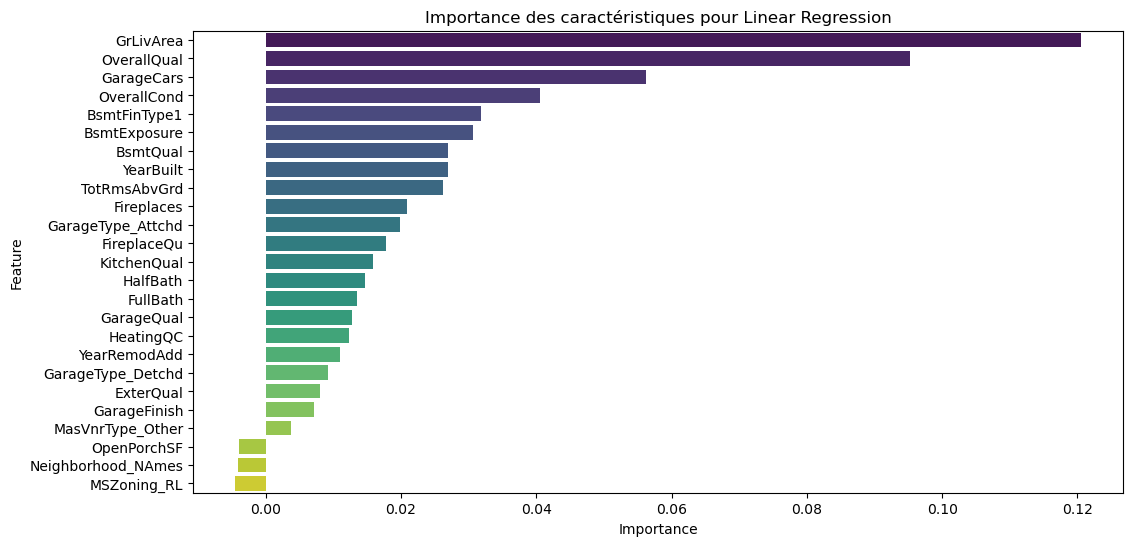

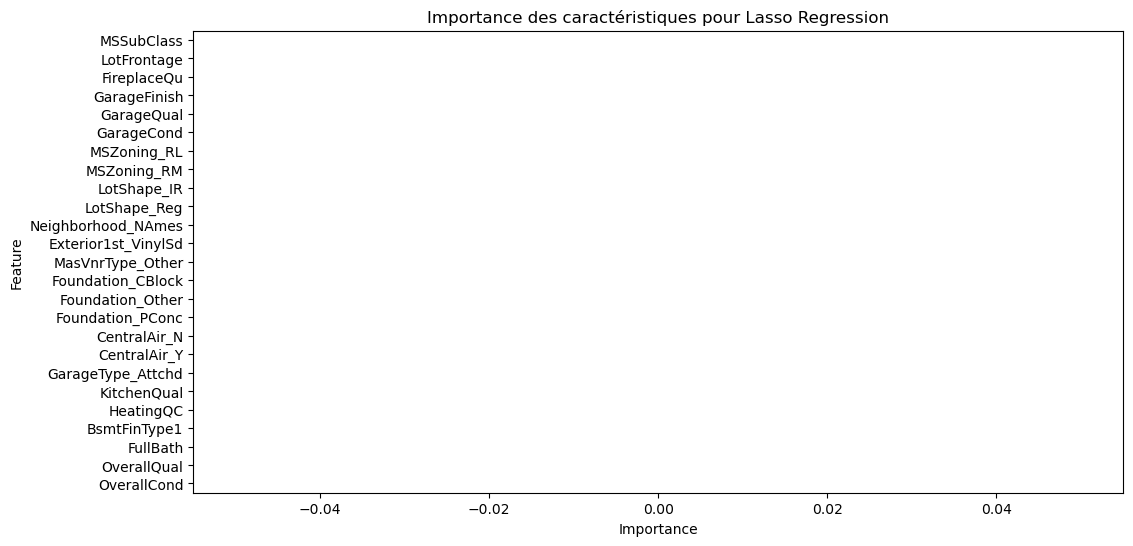

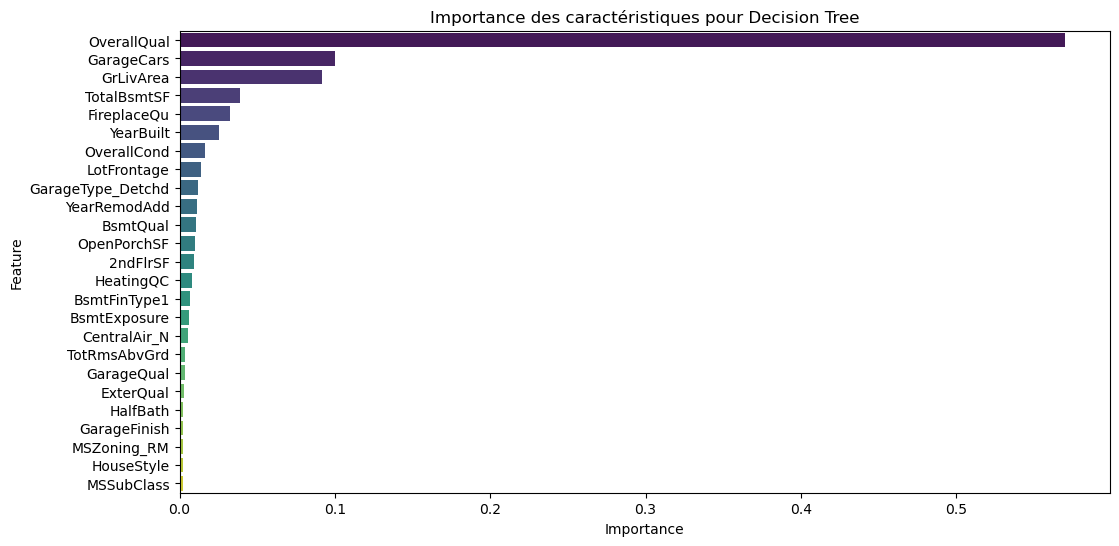

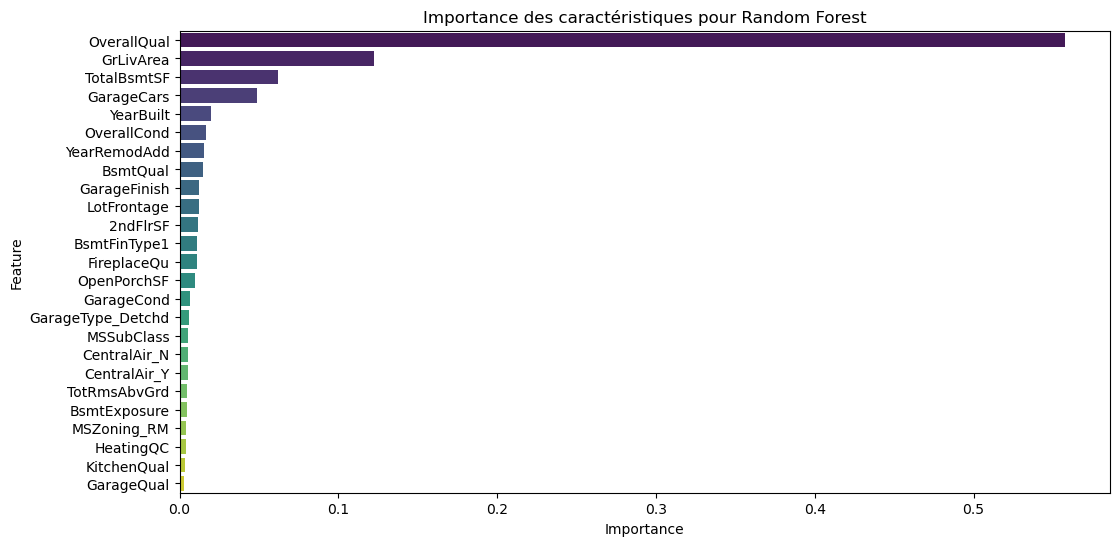

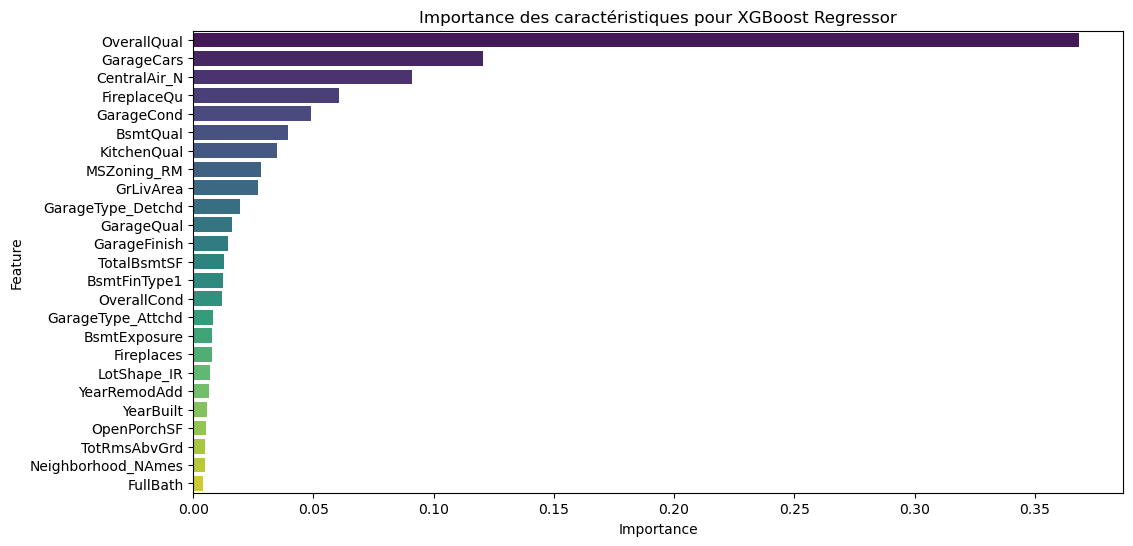

In [22]:
# représentation des features importance
# Boucle sur tous les modèles pour afficher les importances des caractéristiques
for model_name, model in model_pipe.items():
    if 'feature_importances_' in dir(model.named_steps['model']):
        # Extraire les importances des caractéristiques pour les modèles qui supportent cette propriété
        importances = model.named_steps['model'].feature_importances_

        
    elif model_name in ['Lasso Regression', 'Linear Regression'] :
        # recupérer les coefficients pour les modèles linéaire et de lasso
        importances = model[-1].coef_
    else:
        print(f'Le modèle {model_name} ne supporte pas le calcul d\'importance des caractéristiques.')
        continue
        
    # Extraire les noms des caractéristiques
    feature_names = X_train.columns
        
    # Créer un DataFrame pour stocker les importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    # Trier le DataFrame par importance décroissante
    feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

    # Tracer les importances des caractéristiques
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(25), palette='viridis')
    plt.title(f'Importance des caractéristiques pour {model_name}')
    plt.show()


<div style="text-align:justify;font-family:times;font-size:15px">
On peut voir à travers ce graphique que pour certains modèles, comme le Lasso ou le decision tree, certaines valeurs on des coefficient ou importances nulles ou très proches de 0. Donc nous avons surcharger nos modèles de certaines features qui n'apportent rien de substentiel au prédiction sinon augmenter la complexité et les risque de surapprentissage. Nous allons donc réduire le nombre de feature des modèles. 
    
Pour ce faire nous feront recours à la méthode classe RFE de Sklearn.
Le RFE (Recursive Feature Elimination) comme son nom l'indique est une technique de sélection de features qui permet de réduire le nombre de features tout en conservant une bonne performance prédictive. Elle fonctionne de manière itérative en supprimant les features les moins importantes jusqu'à atteindre le nombre de features souhaité.

Nous n'appliquerons pas le RFE sur la regression lasso car cette dernière permet deja la selection des features.
</div>

In [23]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [24]:
# Définir la liste des modèles
models_rfe = {
    'Linear Regression': linear_model.LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost Regressor': XGBRegressor(),
}

# Initialiser des listes pour stocker les résultats pour chaque modèle
results_per_model = []

# Boucle sur chaque modèle
for model_name, model in models_rfe.items():
    nombre = []
    error_test = []
    error_train = []
    selected_features = []
    rfe_pipe_list = []

    # Boucle sur le nombre de caractéristiques
    for i in range(5, len(X.columns)):
        rfe_pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("feature_selection", RFE(estimator=model, n_features_to_select=i)),
            ("regressor", model)
        ])
        rfe_results = train_model(model=rfe_pipe, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test)
        nombre.append(i)
        error_train.append(rfe_results["error_train"])
        error_test.append(rfe_results["error_test"])
        selected_features.append(X_train.columns[rfe_pipe.named_steps['feature_selection'].support_])
        rfe_pipe_list.append(rfe_results["estimator"])

    # Stocker les résultats dans un DataFrame par modèle
    erreur_df_model = pd.DataFrame({
        'nbr_caract': nombre,
        'error_train': error_train,
        'error_test': error_test,
        'model_name': [model_name] * len(nombre)  # Ajouter le nom du modèle pour le suivi
    })

    # Ajouter le DataFrame au résultat global par modèle
    results_per_model.append(erreur_df_model)

# Concaténer les DataFrames résultants pour chaque modèle
erreur_df_all_models = pd.concat(results_per_model, ignore_index=True)


Model error: 0.02712
Model error: 0.02504
Model error: 0.02357
Model error: 0.02302
Model error: 0.02261
Model error: 0.02172
Model error: 0.02107
Model error: 0.02064
Model error: 0.02069
Model error: 0.02083
Model error: 0.02067
Model error: 0.02046
Model error: 0.0208
Model error: 0.02047
Model error: 0.02085
Model error: 0.02086
Model error: 0.02078
Model error: 0.02077
Model error: 0.02056
Model error: 0.02059
Model error: 0.02067
Model error: 0.02067
Model error: 0.02067
Model error: 0.02067
Model error: 0.02063
Model error: 0.02063
Model error: 0.02086
Model error: 0.02079
Model error: 0.02076
Model error: 0.02078
Model error: 0.02083
Model error: 0.0208
Model error: 0.02089
Model error: 0.02096
Model error: 0.02105
Model error: 0.03978
Model error: 0.04086
Model error: 0.04207
Model error: 0.04203
Model error: 0.04411
Model error: 0.04376
Model error: 0.04232
Model error: 0.04494
Model error: 0.04415
Model error: 0.04072
Model error: 0.04691
Model error: 0.04318
Model error: 0.

Graphique pour Decision Tree:


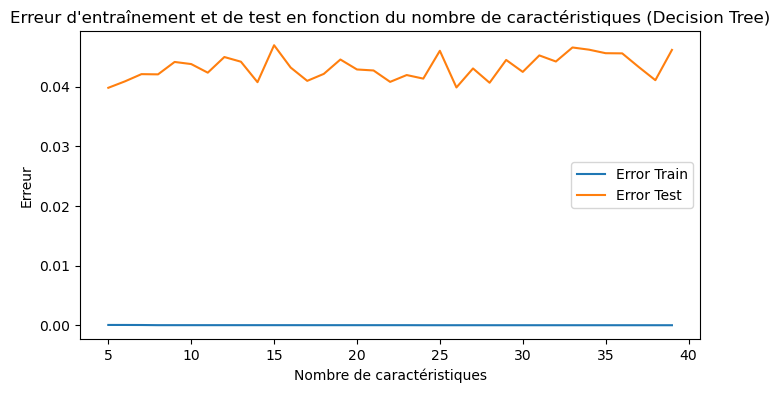

Graphique pour Linear Regression:


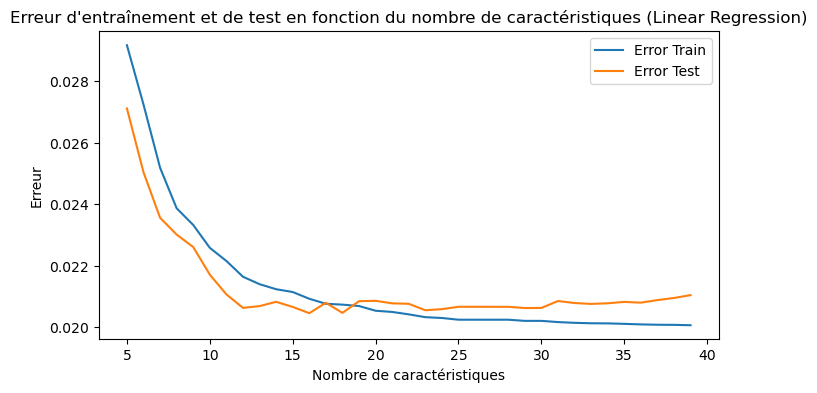

Graphique pour Random Forest:


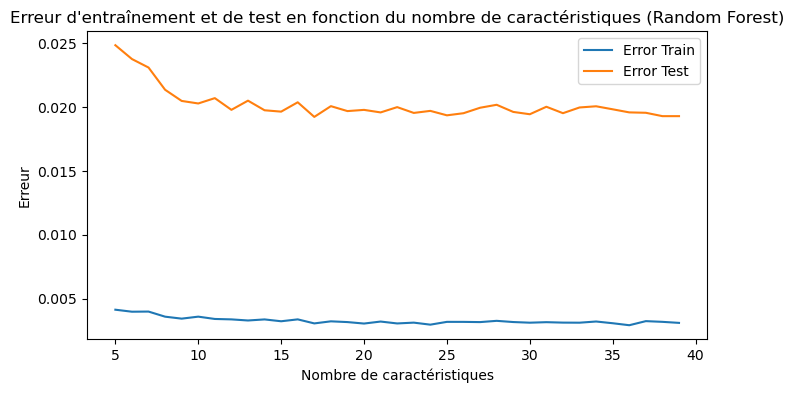

Graphique pour XGBoost Regressor:


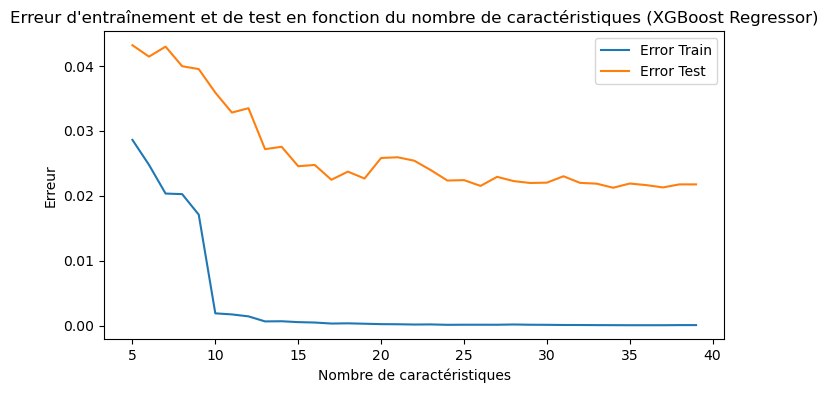

In [25]:
# Représentation graphique par modèle
for model_name, group in erreur_df_all_models.groupby('model_name'):
    print(f"Graphique pour {model_name}:")
    
    # Créer une nouvelle figure pour chaque modèle
    plt.figure(figsize=(8, 4))
    
    # Tracer les courbes d'erreur d'entraînement et de test
    plt.plot(group['nbr_caract'], group['error_train'], label=f'Error Train')
    plt.plot(group['nbr_caract'], group['error_test'], label=f'Error Test')
    
    # Ajouter des étiquettes et une légende
    plt.xlabel('Nombre de caractéristiques')
    plt.ylabel('Erreur')
    plt.title(f'Erreur d\'entraînement et de test en fonction du nombre de caractéristiques ({model_name})')
    plt.legend()
    
    # Afficher le graphique
    plt.show()

<div style="text-align:justify;font-family:times;font-size:15px">
L'analyse des graphiques ci- dessus montre que nombre optimal de features pour chaque modèle est : 
    
- Linear regression : 17
        
- Decision tree : il n'y a pas vraiment de point critiques vu que les deux courbes sont quasi parallèles partout. prenons arbitrairement 20
    
- Random forest : 10
    
- XG Boost regressor : 10 
</div> 

In [26]:
# Initialiser un dictionnaire pour stocker les résultats finaux pour chaque modèle
final_models = {}

# nombres optimaux de caractéristiques pour chaque modèle
optimal_num_features_dict = {
    'Linear Regression': 17,  
    'Decision Tree': 20,
    'Random Forest': 10,
    'XGBoost Regressor': 10,
}

# Boucle sur chaque modèle
for model_name, model in models_rfe.items():
    
    # Créer le pipeline avec le nombre optimal de caractéristiques
    final_model_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("feature_selection", RFE(estimator=model, n_features_to_select=optimal_num_features_dict[model_name])),
        ("model", model)
    ])

    # Entraîner le modèle final avec le nombre optimal de caractéristiques
    results = train_model(model=final_model_pipe, x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test)

    # Stocker le modèle final dans le dictionnaire final_models
    final_models[model_name] = results["estimator"]

# Ajouter la regression lasso
final_models["Lasso Regression"] = Pipeline(steps=[("scaler", StandardScaler()),
                                             ('model', Lasso())])


Model error: 0.0208
Model error: 0.04264
Model error: 0.02085
Model error: 0.0359


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3.2 Optimisation des hyperparamètres </h3>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
Pour l'optimisation des hyperparamètres, nous ferons appel à GridSearchCV. GridSearchCV est une classe de Sklearn qui permet l’optimisation des modèles en recherchant les meilleurs hyperparamètres parmis une liste fournis à l'avance en se basant sur la validation croisée. Pour le choix de la liste des hyperparamètres à lui fournir, nous procéderons un peu par tatonnement en se basant sur ce qu'on a l'habitude de voir dans les modèles sur des sites de competition de Machine Learning comme Kaggle ...</div> 

In [27]:
from sklearn.model_selection import GridSearchCV

<div style="text-align:justify;font-family:times;font-size:15px">
Les résultats de ce premiers test des hyperparamètres sont plutôt satifaisant. Cependant on remarque que :
    
- les meillers hyperparamètres de decision tree à savoir le model__min_samples_leaf et le model__min_samples_split correspondent aux bornes supérieures des listes proposées. Cela pourrait dire que les meilleurs hyperparamètres doivent être plus grand mais à defaut on prend le maximum des proposition. Nous allons donc ajouter des valeurs plus grandes à la liste de proposition et voir si notre hypothèse est vérifiée ; 

- les meillers hyperparamètres de random forest à savoir le model__n_estimators, le model__min_samples_split, , model__min_samples_leaf correspondent aux bornes des listes proposées. Nous allons donc ajouter des valeurs plus grandes et plus petites aux listes des propositions ;
    
- les meillers hyperparamètres de XG boost à savoir le model__n_estimators, model__max_depth correspondent aux bornes des listes proposées. Nous allons donc ajouter des valeurs plus grandes et plus petites aux listes des propositions ;

</div>

Les résultats de ce second test confirment nos hypothèses et laissent entrevoir quelques autres bornent à repousser. Procédont à un autre test

In [ ]:
# Définir une grille d'hyperparamètres pour chaque modèle
param_grids = {
    'Linear Regression': {'model__fit_intercept': [True, False]},
    
    'Lasso Regression': {'model__alpha': [0.001, 0.01, 0.1],
                        'model__fit_intercept': [True, False]},
    
    'Decision Tree': {'model__max_depth': [None, 10, 15, 20],
                      'model__min_samples_split': [20, 30, 40, 50, 60],
                      'model__min_samples_leaf': [4, 6, 10]},
    
    'Random Forest': {'model__n_estimators': [50, 100, 150, 155],
                      'model__max_depth': [None,30, 45],
                      'model__min_samples_split': [1, 2, 5],
                      'model__min_samples_leaf': [1, 2, 4]},
    
    'XGBoost Regressor': {'model__n_estimators': [150, 160, 200],
                          'model__learning_rate': [0.01, 0.1, 0.2],
                          'model__max_depth': [2, 3, 5]}
}

# Résultats de l'optimisation
optimized_models = {}

# Boucle sur tous les modèles
for model_name, model in final_models.items():
    print(f"Optimisation des hyperparamètres pour {model_name}...")

    # Définir la recherche par grille avec validation croisée
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grids[model_name],
                               scoring='neg_mean_squared_error',
                               cv=5)

    # Effectuer la recherche sur les données d'entraînement
    grid_search.fit(X_train, y_train)

    # Afficher les meilleurs hyperparamètres trouvés
    print(f"Meilleurs hyperparamètres pour {model_name}: {grid_search.best_params_}")

    # Utiliser le modèle avec les meilleurs hyperparamètres pour la prédiction
    best_model = grid_search.best_estimator_

    # Sauvegarder le modèle optimisé
    optimized_models[model_name] = best_model

    # Afficher les performances avec les meilleurs hyperparamètres
    performances_best_model = get_all_performances((y_train, best_model.predict(X_train)),
                                                   (y_test, best_model.predict(X_test)),
                                                   METRICS)
    print(f"Performances pour {model_name} avec les meilleurs hyperparamètres:")
    print(performances_best_model)
    print("\n")


Optimisation des hyperparamètres pour Linear Regression...
Meilleurs hyperparamètres pour Linear Regression: {'model__fit_intercept': True}
Performances pour Linear Regression avec les meilleurs hyperparamètres:
                           metric     train      test
0                        r2_score  0.866017  0.877391
1              mean_squared_error  0.020768  0.020800
2         root_mean_squared_error  0.144112  0.144223
3  mean_absolute_percentage_error  0.008265  0.008644
4                       max_error  1.513692  0.810490


Optimisation des hyperparamètres pour Decision Tree...
Meilleurs hyperparamètres pour Decision Tree: {'model__max_depth': 20, 'model__min_samples_leaf': 6, 'model__min_samples_split': 30}
Performances pour Decision Tree avec les meilleurs hyperparamètres:
                           metric     train      test
0                        r2_score  0.869818  0.798364
1              mean_squared_error  0.020179  0.034207
2         root_mean_squared_error  0.142053 

<div style="text-align:justify;font-family:times;font-size:15px">
Aucun des hyperparamètre n'est une borne. Nous pouvons donc valider ces résultats.

Globalement, il ressort de cette optimisation des hyperparamètres que l'optimisation des hyperparamètres a peu d'impact sur les performances de la régression linéaire et de la régression lasso, suggérant qu'elles sont déjà proches de leurs performances optimales ou ne s'ajustent pas bien aux données. En revanche, les performances des arbres de décision, des forêts aléatoires et de XGBoost ont toutes été améliorées, indiquant une sensibilité accrue à ces modèles aux hyperparamètres. Enfin, Random Forest et XGBoost présentent encore les meilleures performances globales, avec un R-carré plus élevé, un MSE et un MAPE inférieurs. 
    
Cependant, les modèles ensemblistes et non linéaires tendent vers le surapprentissage. Nous allons essayer de contourner cela en optant pour la validation croisée. En effet, La validation croisée permet de réduire le risque de surapprentissage en s'assurant que le modèle ne s'adapte pas à un seul fold. De plus il permet de comparer les performances de différents modèles.
</div>

<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 4. Choix du meilleur modèle </h1>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1 Comparaison des modèles </h2>
</div>

<div style="text-align:justify;font-family:times;font-size:15px">
l'utilisation de la validation croisée est une approche robuste pour évaluer les performances des modèles.elle permet de s'assurer que les performances du modèle ne sont pas biaisées par une seule partition des données en jeux d'entraînement et de test. C'est donc cette approche que nous utiliserons pour comparer les modèles.
</div>

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [38]:
def evaluate_model_cv(model, X, y, cv=10, metrics=METRICS):
    scores = {}
    for metric in metrics:
        y_pred = cross_val_predict(model, X, y, cv=cv)
        score = metric(y, y_pred)
        scores[metric.__name__] = score
    return scores

In [39]:
# Évaluez chaque modèle en utilisant l'évaluation croisée avec toutes les métriques
cv_results = {}
for model_name, model in optimized_models.items():
    model_scores = evaluate_model_cv(model, X, y, metrics=METRICS)
    cv_results[model_name] = model_scores

# Affichage des résultats
for model_name, scores in cv_results.items():
    print(f"{model_name}:")
    for metric_name, score in scores.items():
        print(f"  {metric_name}: {score:.4f}")
    print()

Linear Regression:
  r2_score: 0.8561
  mean_squared_error: 0.0229
  root_mean_squared_error: 0.1515
  mean_absolute_percentage_error: 0.0083
  max_error: 2.3935

Decision Tree:
  r2_score: 0.7984
  mean_squared_error: 0.0321
  root_mean_squared_error: 0.1793
  mean_absolute_percentage_error: 0.0108
  max_error: 1.1309

Random Forest:
  r2_score: 0.8727
  mean_squared_error: 0.0203
  root_mean_squared_error: 0.1427
  mean_absolute_percentage_error: 0.0081
  max_error: 1.0888

XGBoost Regressor:
  r2_score: 0.8892
  mean_squared_error: 0.0177
  root_mean_squared_error: 0.1329
  mean_absolute_percentage_error: 0.0077
  max_error: 1.2027

Lasso Regression:
  r2_score: 0.8553
  mean_squared_error: 0.0231
  root_mean_squared_error: 0.1519
  mean_absolute_percentage_error: 0.0083
  max_error: 2.3136



In [40]:
# Récupérer les résultats de la validation croisée
cv_results_df = pd.DataFrame(cv_results)

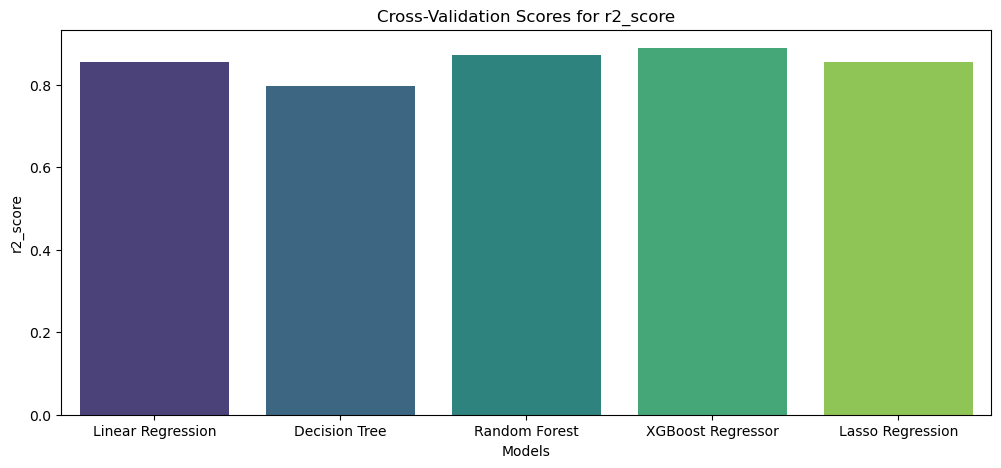

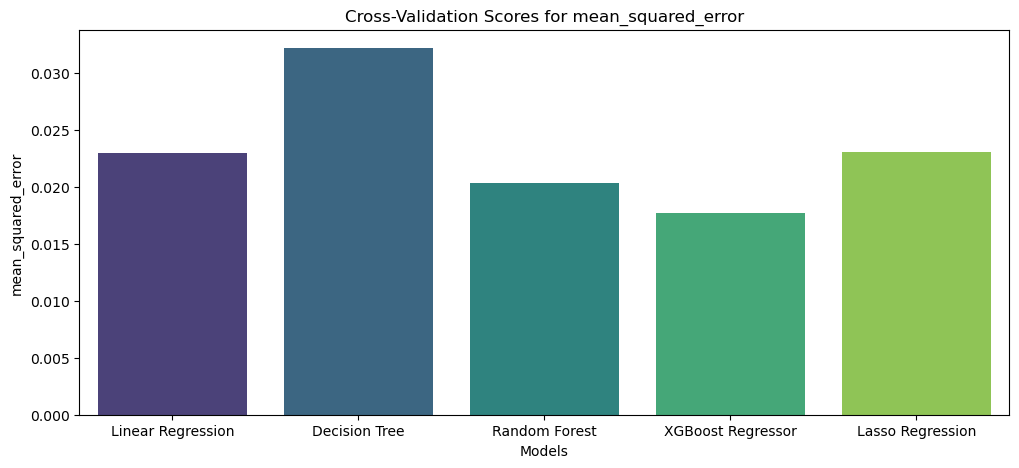

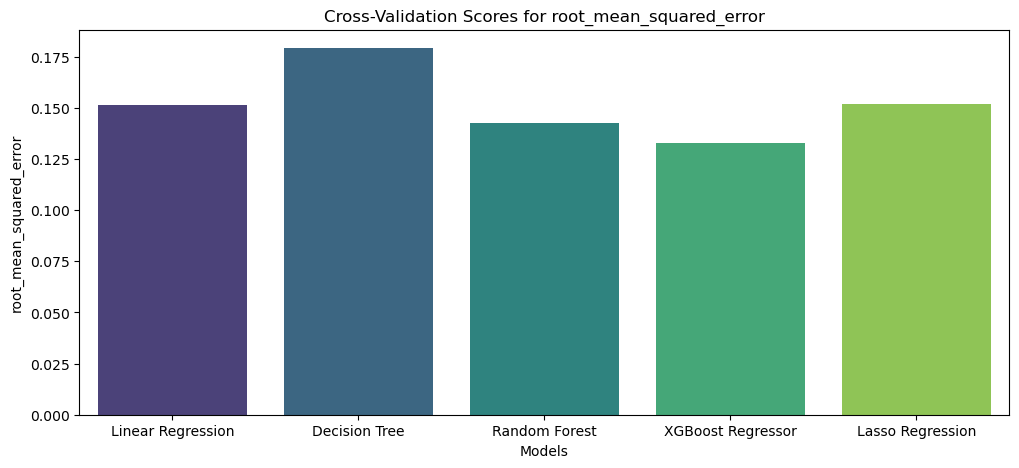

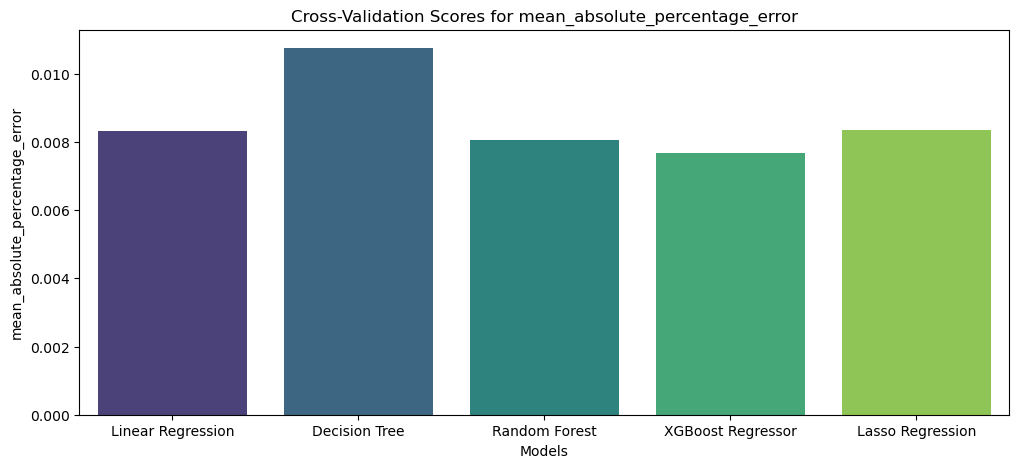

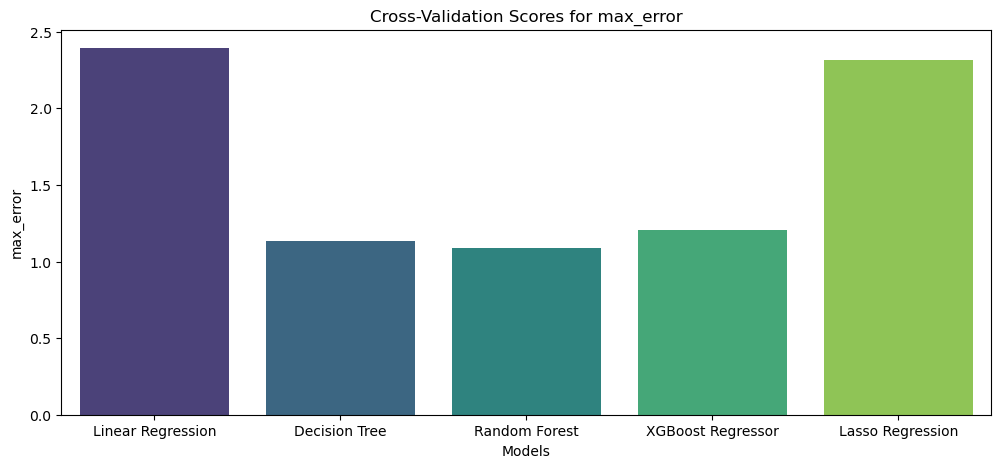

In [43]:
# Utiliser une palette de couleurs Seaborn
palette = sns.color_palette("viridis", n_colors=len(optimized_models))

# Boucle sur toutes les métriques
for metric in METRICS:
    # Créer un graphique à barres pour chaque métrique
    plt.figure(figsize=(12, 5))
    sns.barplot(x=cv_results_df.columns, y=cv_results_df.loc[metric.__name__], palette=palette)
    plt.title(f'Cross-Validation Scores for {metric.__name__}')
    plt.xlabel('Models')
    plt.ylabel(metric.__name__)
    plt.show()

<div style="text-align:justify;font-family:times;font-size:15px">
L'analyse des gaphiques ci-dessus nous permet de voir que tous les modèles ont d'assez bonnes performances en moyenne. Mais :

- XGBoost Regressor semble être le modèle le plus performant avec le R-squared le plus élevé (0.8892) et le MSE le plus bas (0.0177).
    
- Random Forest et Linear Regression le suivent de près avec des R-squared similaires mais un MSE légèrement plus élevé.

- Lasso Regression et Decision Tree ont des R-squared plus bas et des MSE plus élevés, ce qui suggère qu'ils pourraient ne pas être aussi généralisables.
    
Vu que notre objectif est plus la prédiction que l'explication, nous allons retenir le modèle avec les meilleurs performances c'est à dire le **XGBoost Regressor**
 
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 modèle final : XG Boost Regressor </h2>
</div>

In [ ]:
set_config(display='diagram')
best_model = optimized_models['XGBoost Regressor']
best_model

Caractéristiques les plus importantes pour la prédiction du prix des maisons sont :
2             OverallQual
23           GarageFinish
8               GrLivArea
13             GarageCars
16              ExterQual
17               BsmtQual
36           CentralAir_N
38      GarageType_Attchd
21            KitchenQual
22            FireplaceQu
27            MSZoning_RM
25             GarageCond
6             TotalBsmtSF
12             Fireplaces
26            MSZoning_RL
5            YearRemodAdd
39      GarageType_Detchd
19           BsmtFinType1
4               YearBuilt
18           BsmtExposure
24             GarageQual
3             OverallCond
14            OpenPorchSF
10               HalfBath
7                2ndFlrSF
28            LotShape_IR
15             HouseStyle
1             LotFrontage
11           TotRmsAbvGrd
20              HeatingQC
31    Exterior1st_VinylSd
0              MSSubClass
33      Foundation_CBlock
30     Neighborhood_NAmes
34       Foundation_Other
35    

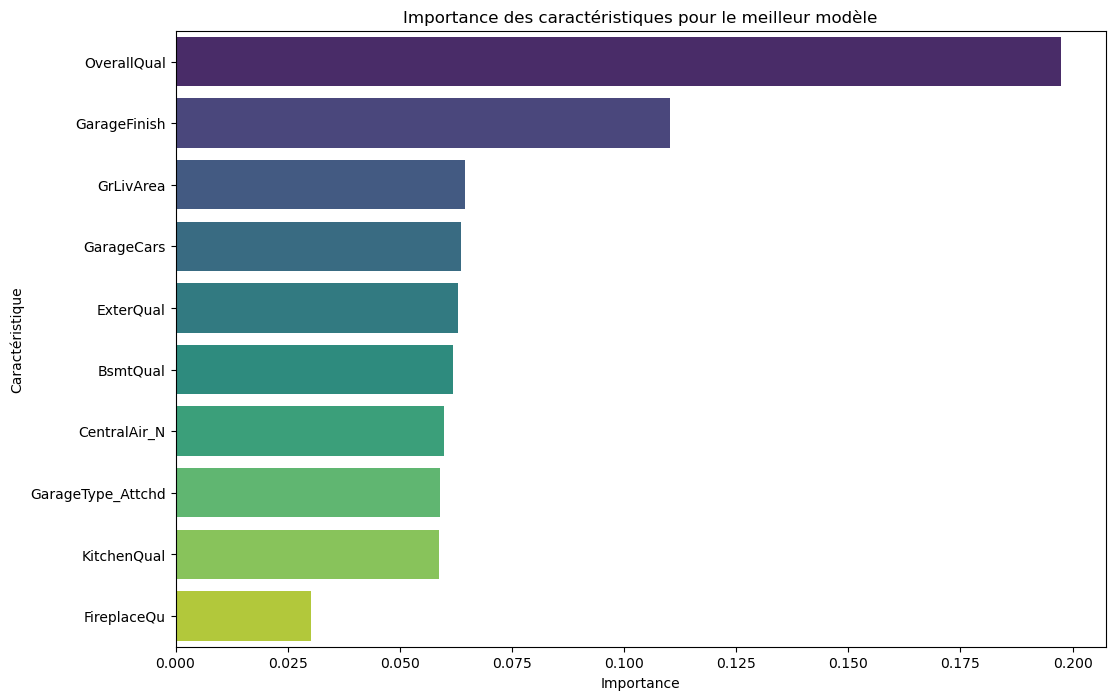

In [49]:
# Récupérer les importances des caractéristiques
importances = best_model.named_steps['model'].feature_importances_

# Extraire les noms des caractéristiques
feature_names = X_train.columns

# Créer un DataFrame pour stocker les importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Trier le DataFrame par importance décroissante
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Afficher les caractéristiques les plus importantes
print("Caractéristiques les plus importantes pour la prédiction du prix des maisons sont :")
print(feature_importance_df["Feature"])

 # Afficher un graphique à barres horizontales des caractéristiques les plus importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Importance des caractéristiques pour le meilleur modèle')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.show()